In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import requests
from PIL import Image
import pickle
from datetime import datetime
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display, Image

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.python (from versions: none)
ERROR: No matching distribution found for tensorflow.python


In [4]:
pip install keras


     ---------------------------------------- 1.7/1.7 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from IPython.display import display, Image

fashion_df = pd.read_csv("C:\\Users\\DELL\\ImageRecommendation\\Book1.csv")
print(fashion_df)

    ProductId Gender  Category SubCategory   ProductType     Colour   Usage  \
0        1636    Men  Footwear       Shoes  Sports Shoes      White  Sports   
1        1637    Men  Footwear       Shoes  Sports Shoes      White  Sports   
2        1653    Men  Footwear       Shoes  Sports Shoes      Brown  Sports   
3        1654    Men  Footwear       Shoes  Sports Shoes      White  Sports   
4        1806    Men  Footwear      Sandal       Sandals      Brown  Casual   
5        1831    Men  Footwear       Shoes  Sports Shoes      Black  Sports   
6        1836    Men  Footwear       Shoes  Sports Shoes     Silver  Sports   
7        2211    Men  Footwear      Sandal       Sandals  Navy Blue  Casual   
8       41991   Boys   Apparel     Topwear        Shirts      Black  Casual   
9       42778   Boys   Apparel     Topwear       Tshirts      Green  Casual   
10      43581   Boys   Apparel     Topwear        Shirts      White  Casual   
11      43582   Boys   Apparel     Topwear        Sh

In [4]:
print("Total number of products : ", fashion_df.shape[0])
print("Total number of unique subcategories : ", fashion_df["SubCategory"].nunique())
print("Total number of unique gender types : ", fashion_df["Gender"].nunique())

Total number of products :  25
Total number of unique subcategories :  4
Total number of unique gender types :  4


In [5]:
fashion_df["Gender"].value_counts()

Men      8
Boys     6
Girls    6
Women    5
Name: Gender, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


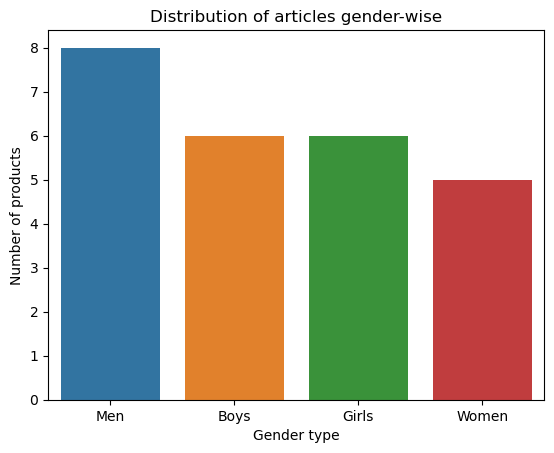

In [6]:
plot = sns.countplot(fashion_df["Gender"])
plt.title("Distribution of articles gender-wise")
plt.xlabel("Gender type")
plt.ylabel("Number of products")
plot.set_xticklabels(plot.get_xticklabels())
plt.show()

In [19]:
apparel_boys = fashion_df[fashion_df["Gender"]=="Boys"]
apparel_girls = fashion_df[fashion_df["Gender"]=="Girls"]
footwear_men = fashion_df[fashion_df["Gender"]=="Men"]
footwear_women = fashion_df[fashion_df["Gender"]=="Women"]

In [ ]:
pip install keras

In [8]:
import numpy as np
from datetime import datetime
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50

img_width, img_height = (224, 224)
train_data_dir = "C:\\Users\\DELL\\ImageRecommendation\\data\\Footwear\\Men\\Images\\"
nb_train_samples = 8
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    Model = ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    for i in generator.filenames:
        Itemcodes.append(i.split("\\")[-1].split(".")[0])  # Extract product IDs
    
    # Calculate the number of steps required to process the entire dataset
    steps = nb_train_samples // batch_size
    
    # Extract features for all images
    extracted_features = Model.predict(generator, steps=steps, verbose=1)
    
    # Reshape the extracted features to (number of samples, 7*7*2048)
    extracted_features = extracted_features.reshape((nb_train_samples, -1))
    
    # Save the extracted features and product IDs
    np.save('C:\\Users\\DELL\\ImageRecommendation\\Men_ResNet_features.npy', extracted_features)
    np.save('C:\\Users\\DELL\\ImageRecommendation\\Men_ResNet_feature_product_ids.npy', np.array(Itemcodes))

a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)


Found 8 images belonging to 1 classes.
8/8 [==============================] - 3s 230ms/step
Time taken in feature extraction 0:00:05.755018


In [9]:
img_width, img_height = (224, 224)

#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "C:\\Users\\DELL\\ImageRecommendation\\data\\Footwear\\Apparel\\Boys\\Images"

nb_train_samples = 6
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    Model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i.split("\\")[-1].split(".")[0])  # Extract product IDs
    
    # Calculate the number of steps required to process the entire dataset
    steps = nb_train_samples // batch_size
    
    # Extract features for all images
    extracted_features = Model.predict(generator, steps=steps, verbose=1)
    
    # Reshape the extracted features to (number of samples, 7*7*2048)
    extracted_features = extracted_features.reshape((nb_train_samples, -1))
    
    # Save the extracted features and product IDs
    np.save('C:\\Users\\DELL\\ImageRecommendation\\Boys_ResNet_features.npy', extracted_features)
    np.save('C:\\Users\\DELL\\ImageRecommendation\\Boys_ResNet_feature_product_ids.npy', np.array(Itemcodes))

a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)

Found 6 images belonging to 1 classes.
6/6 [==============================] - 3s 211ms/step
Time taken in feature extraction 0:00:05.335649


In [12]:
img_width, img_height = (224, 224)


#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "C:\\Users\\DELL\\ImageRecommendation\\data\\Footwear\\Women\\Images"

nb_train_samples = 5
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    Model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i.split("\\")[-1].split(".")[0])  # Extract product IDs
    
    # Calculate the number of steps required to process the entire dataset
    steps = nb_train_samples // batch_size
    
    # Extract features for all images
    extracted_features = Model.predict(generator, steps=steps, verbose=1)
    
    # Reshape the extracted features to (number of samples, 7*7*2048)
    extracted_features = extracted_features.reshape((nb_train_samples, -1))
    
    # Save the extracted features and product IDs
    np.save('C:\\Users\\DELL\\ImageRecommendation\\Women_ResNet_features.npy', extracted_features)
    np.save('C:\\Users\\DELL\\ImageRecommendation\\Women_ResNet_feature_product_ids.npy', np.array(Itemcodes))

a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)
      

Found 5 images belonging to 1 classes.
5/5 [==============================] - 2s 207ms/step
Time taken in feature extraction 0:00:05.129764


In [15]:
img_width, img_height = (224, 224)
#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "C:\\Users\\DELL\\ImageRecommendation\\data\\Footwear\\Apparel\\Girls\\Images"

nb_train_samples = 6
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    Model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i.split("\\")[-1].split(".")[0])  # Extract product IDs
    
    # Calculate the number of steps required to process the entire dataset
    steps = nb_train_samples // batch_size
    
    # Extract features for all images
    extracted_features = Model.predict(generator, steps=steps, verbose=1)
    
    # Reshape the extracted features to (number of samples, 7*7*2048)
    extracted_features = extracted_features.reshape((nb_train_samples, -1))
    
    # Save the extracted features and product IDs
    np.save('C:\\Users\\DELL\\ImageRecommendation\\Girls_ResNet_features.npy', extracted_features)
    np.save('C:\\Users\\DELL\\ImageRecommendation\\Girls_ResNet_feature_product_ids.npy', np.array(Itemcodes))

a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)

Found 6 images belonging to 1 classes.
6/6 [==============================] - 2s 177ms/step
Time taken in feature extraction 0:00:05.301946


In [16]:
boys_extracted_features = np.load('C:\\Users\\DELL\\ImageRecommendation\\Boys_ResNet_features.npy')
boys_Productids = np.load('C:\\Users\\DELL\\ImageRecommendation\\Boys_ResNet_feature_product_ids.npy')
girls_extracted_features = np.load('C:\\Users\\DELL\\ImageRecommendation\\Girls_ResNet_features.npy')
girls_Productids = np.load('C:\\Users\\DELL\\ImageRecommendation\\Girls_ResNet_feature_product_ids.npy')
men_extracted_features = np.load('C:\\Users\\DELL\\ImageRecommendation\\Men_ResNet_features.npy')
men_Productids = np.load('C:\\Users\\DELL\\ImageRecommendation\\Men_ResNet_feature_product_ids.npy')
women_extracted_features = np.load('C:\\Users\\DELL\\ImageRecommendation\\Women_ResNet_features.npy')
women_Productids = np.load('C:\\Users\\DELL\\ImageRecommendation\\Women_ResNet_feature_product_ids.npy')
fashion_df["ProductId"] = fashion_df["ProductId"].astype(str)

In [27]:
print(fashion_df)

   ProductId Gender  Category SubCategory   ProductType     Colour   Usage  \
0       1636    Men  Footwear       Shoes  Sports Shoes      White  Sports   
1       1637    Men  Footwear       Shoes  Sports Shoes      White  Sports   
2       1653    Men  Footwear       Shoes  Sports Shoes      Brown  Sports   
3       1654    Men  Footwear       Shoes  Sports Shoes      White  Sports   
4       1806    Men  Footwear      Sandal       Sandals      Brown  Casual   
5       1831    Men  Footwear       Shoes  Sports Shoes      Black  Sports   
6       1836    Men  Footwear       Shoes  Sports Shoes     Silver  Sports   
7       2211    Men  Footwear      Sandal       Sandals  Navy Blue  Casual   
8      41991   Boys   Apparel     Topwear        Shirts      Black  Casual   
9      42778   Boys   Apparel     Topwear       Tshirts      Green  Casual   
10     43581   Boys   Apparel     Topwear        Shirts      White  Casual   
11     43582   Boys   Apparel     Topwear        Shirts      Whi

==================== input product details ====================


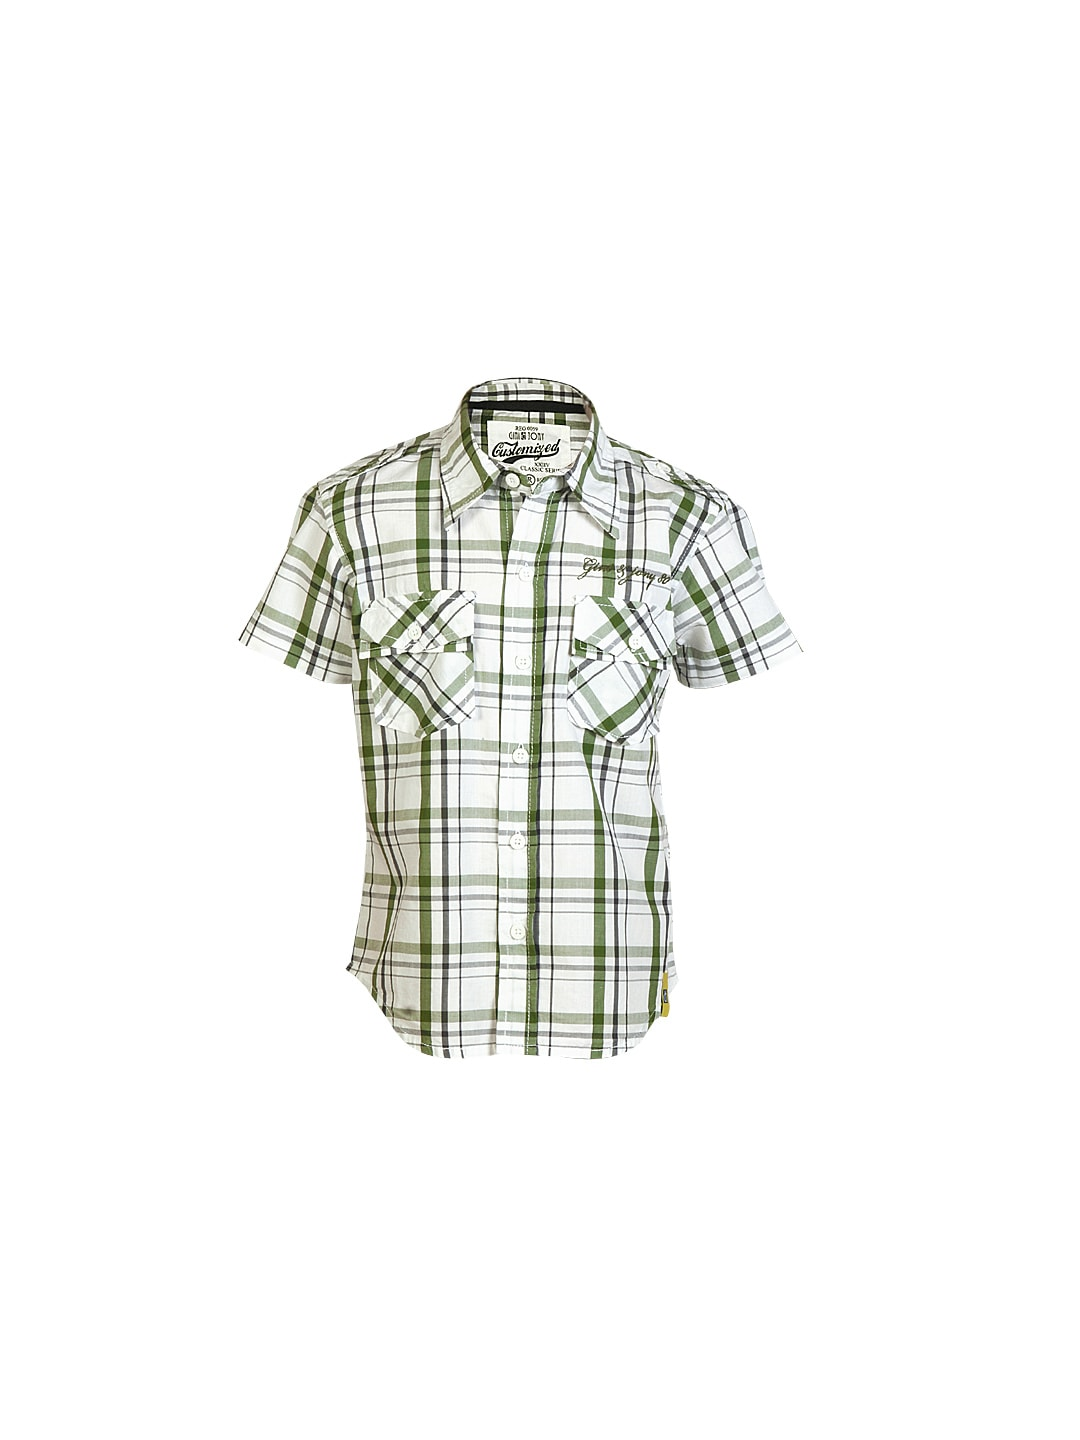

Product Title:  Gini and Jony Boys White Shirt

 ==================== Recommended products ====================


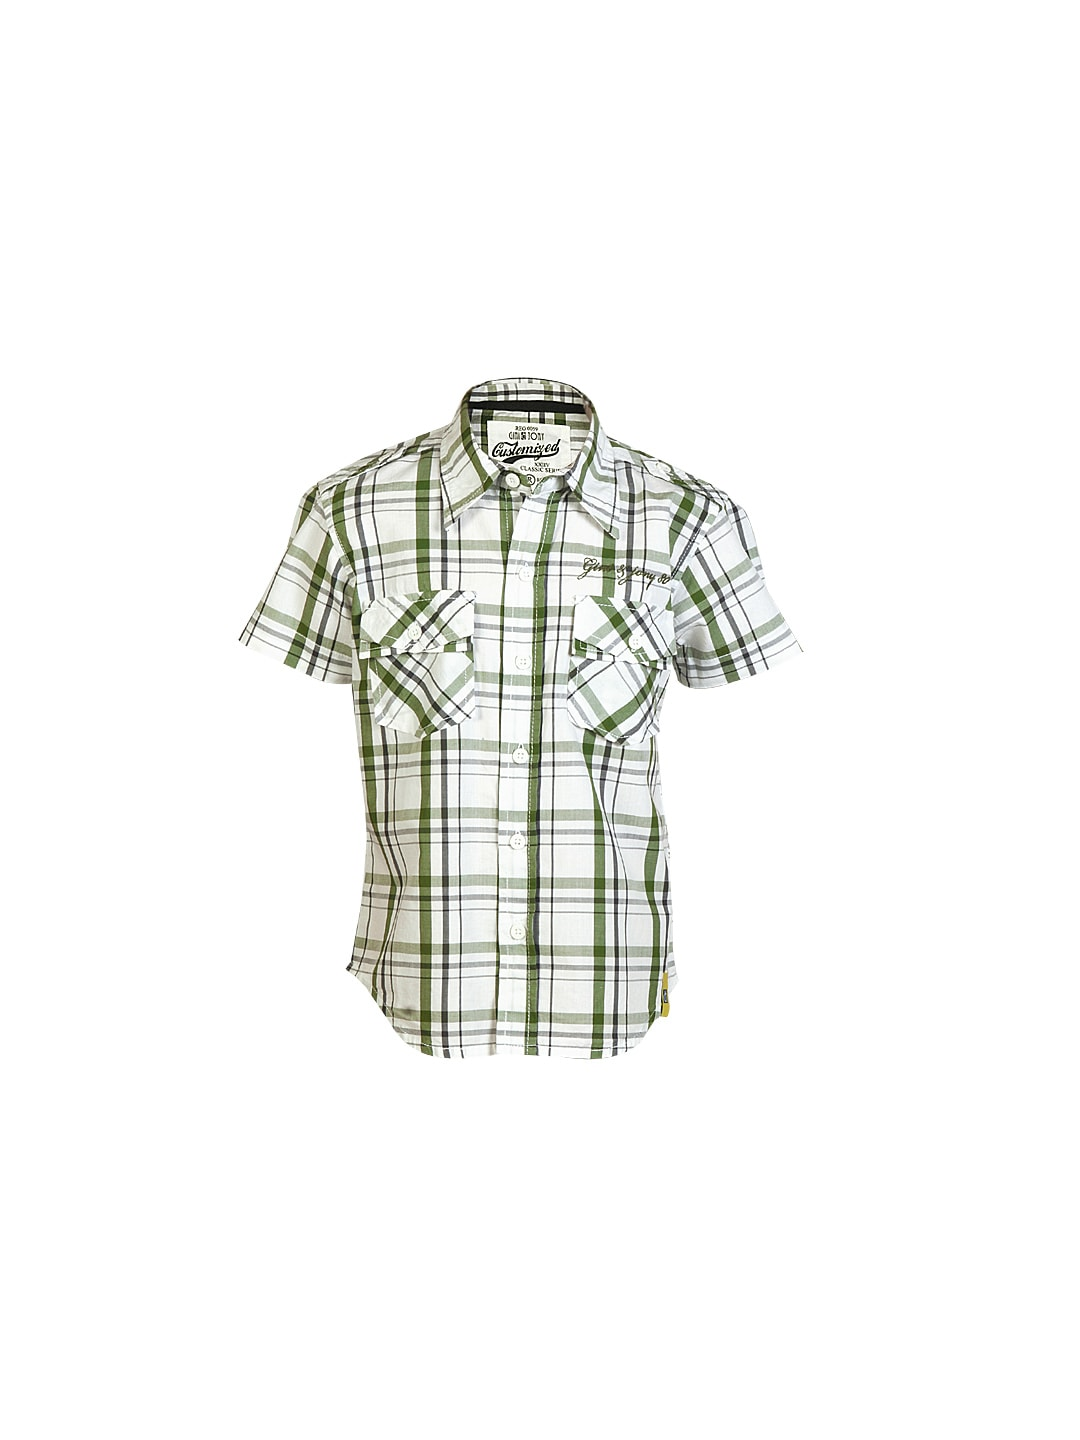

Product Title:  Gini and Jony Boys White Check Shirt
Euclidean Distance from input image: 5.3947965e-06


In [17]:
def get_similar_products_cnn(product_id, num_results):
    if(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Boys"):
        extracted_features = boys_extracted_features
        Productids = boys_Productids
    elif(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Girls"):
        extracted_features = girls_extracted_features
        Productids = girls_Productids
    elif(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Men"):
        extracted_features = men_extracted_features
        Productids = men_Productids
    elif(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Women"):
        extracted_features = women_extracted_features
        Productids = women_Productids
    Productids = list(Productids)
    doc_id = Productids.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    print("="*20, "input product details", "="*20)
    ip_row = fashion_df[['ImageURL','ProductTitle']].loc[fashion_df['ProductId']==Productids[indices[0]]]
    for indx, row in ip_row.iterrows():
        display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
        print('Product Title: ', row['ProductTitle'])
    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1,len(indices)):
        rows = fashion_df[['ImageURL','ProductTitle']].loc[fashion_df['ProductId']==Productids[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['ProductTitle'])
            print('Euclidean Distance from input image:', pdists[i])
get_similar_products_cnn('43581', 2)

In [36]:
pip freeze >requirements.txt

Note: you may need to restart the kernel to use updated packages.
